In [1]:
import scvelo as scv
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
top_dir = "/home/owenwhitley/projects/su2c_v2"
preproc_dir = os.path.join(top_dir, 'data/preprocessed/scRNA/velocyto_GBM_GSCs_split_by_sample_no_G800_L')
loom_file = os.path.join(preproc_dir, 'GSCs_GBM_combined_subs.loom')
output_dir = os.path.join(top_dir, 'results/scRNA/scvelo')
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [3]:
scv.logging.print_version()
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
# scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

Running scvelo 0.2.2 (python 3.8.5) on 2020-10-25 22:39.


In [4]:
adata = scv.read(loom_file, cache=False)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
adata.var_names_make_unique()

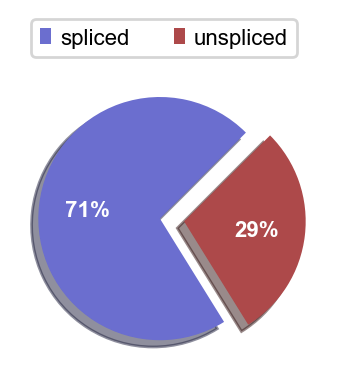

In [6]:
scv.pl.proportions(adata)

In [7]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 47061 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.


In [8]:
scv.tl.velocity(adata)

computing neighbors
    finished (0:00:14) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [9]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:46) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [10]:
DM_coords = adata.obs.loc[:, ['DM1', 'DM2']].to_numpy()

In [11]:
adata.obs.keys()

Index(['CC.Difference', 'DM1', 'DM2', 'Dev_IR_Diff', 'Dev_IR_Diff_zscore',
       'G2M.Score', 'Neftel_AC_AUC', 'Neftel_G1.S_AUC', 'Neftel_G2.M_AUC',
       'Neftel_MES1_AUC',
       ...
       'orig.ident', 'percent.mito', 'scBTSC_AUC', 'scGBM_AUC', 'unique_id',
       'initial_size_spliced', 'initial_size_unspliced', 'initial_size',
       'n_counts', 'velocity_self_transition'],
      dtype='object', length=135)

In [12]:
adata.obs['SampleType'] = 'GSC'

In [13]:
adata.obs['SampleType'].loc[adata.obs.index[adata.obs['orig.ident'] == 'GBM']] = 'GBM'

In [14]:
adata.obsm['dm'] = DM_coords

Renamed 'dm' to convention 'X_dm' (adata.obsm).
computing velocity embedding
    finished (0:00:05) --> added
    'velocity_dm', embedded velocity vectors (adata.obsm)


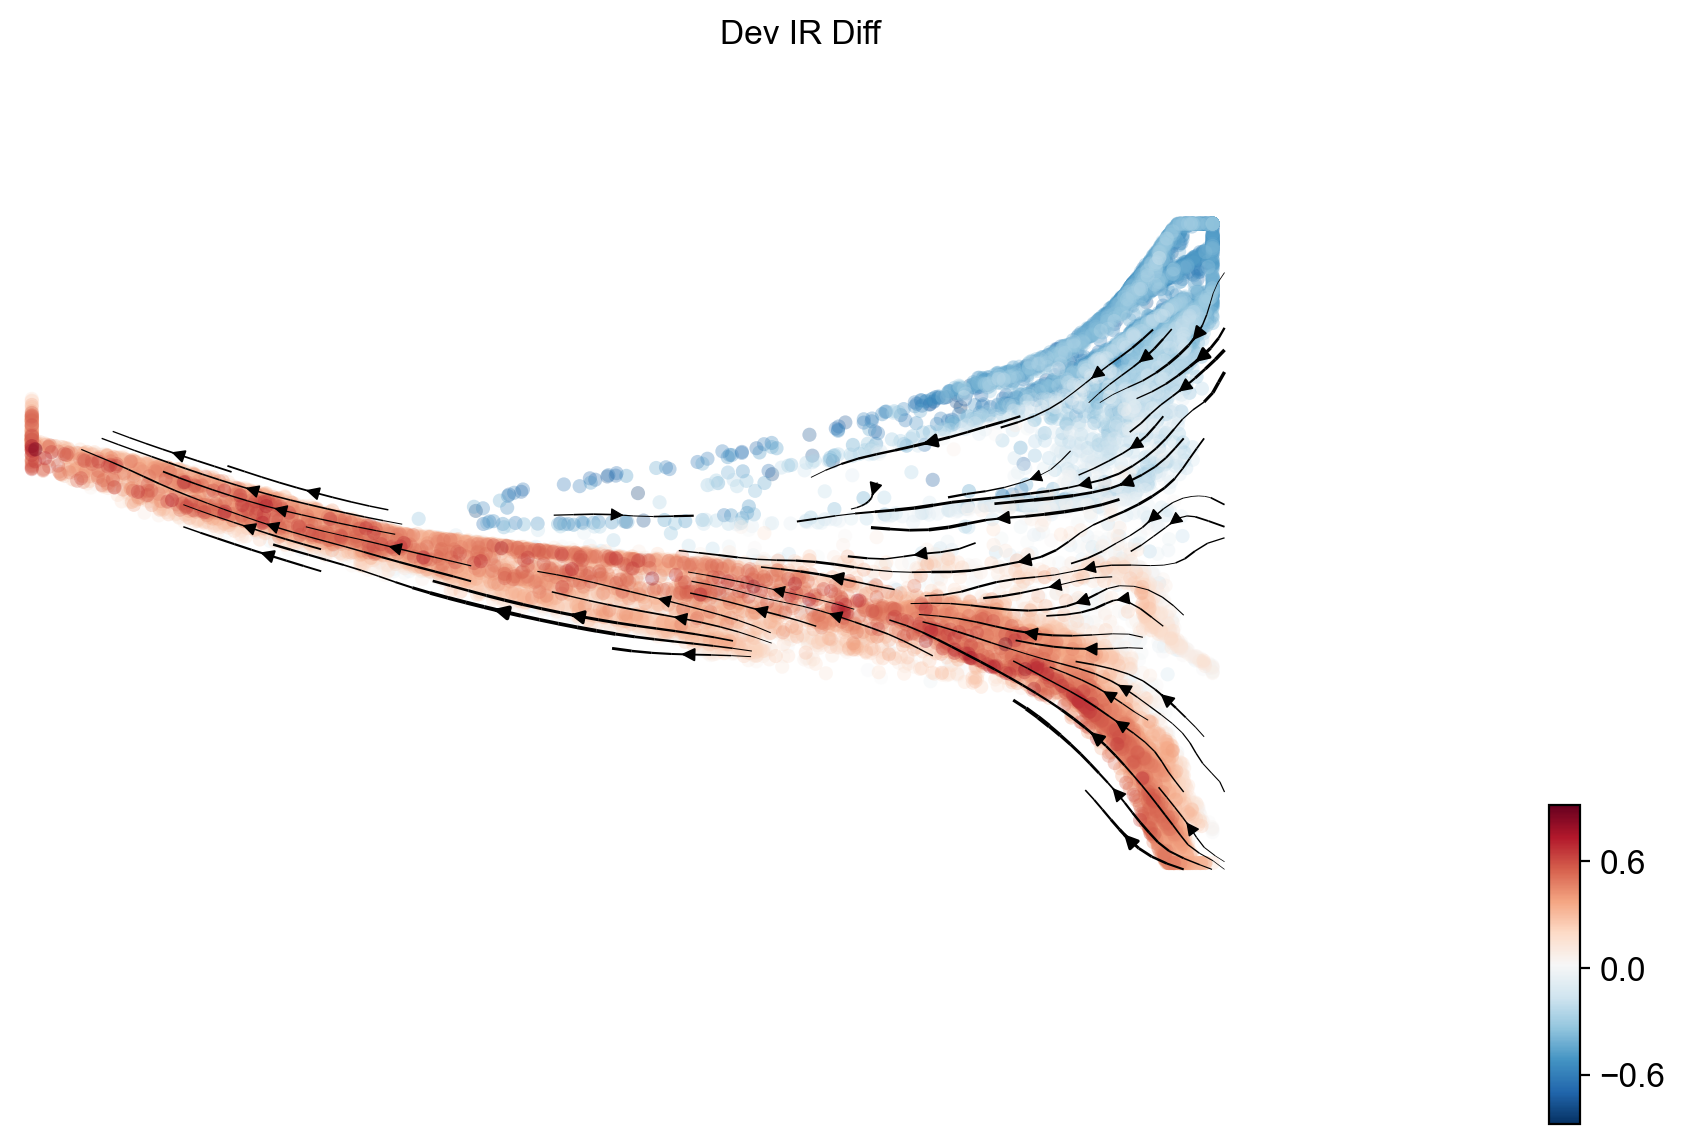

In [15]:
scv.pl.velocity_embedding_stream(adata, basis = 'dm', color = 'Dev_IR_Diff', figsize = (10, 7))

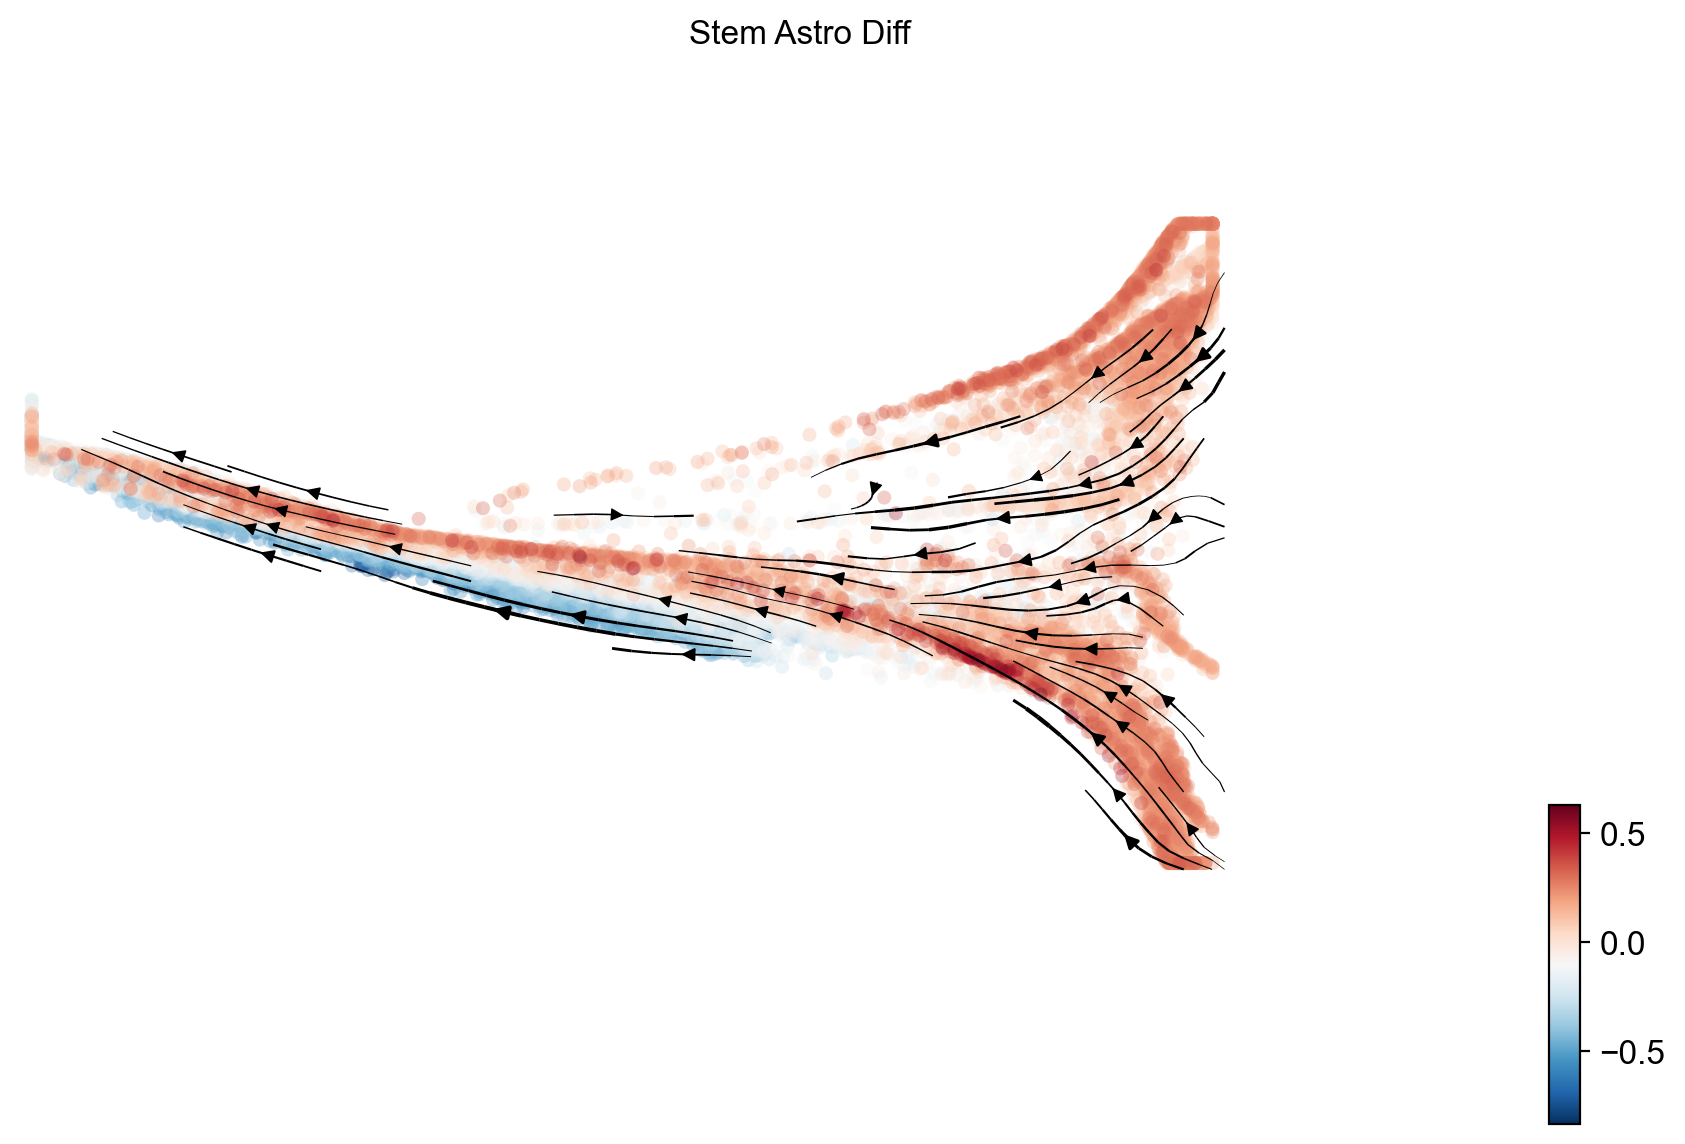

In [16]:
scv.pl.velocity_embedding_stream(adata, basis = 'dm', color = 'Stem_Astro_Diff', figsize = (10, 7))

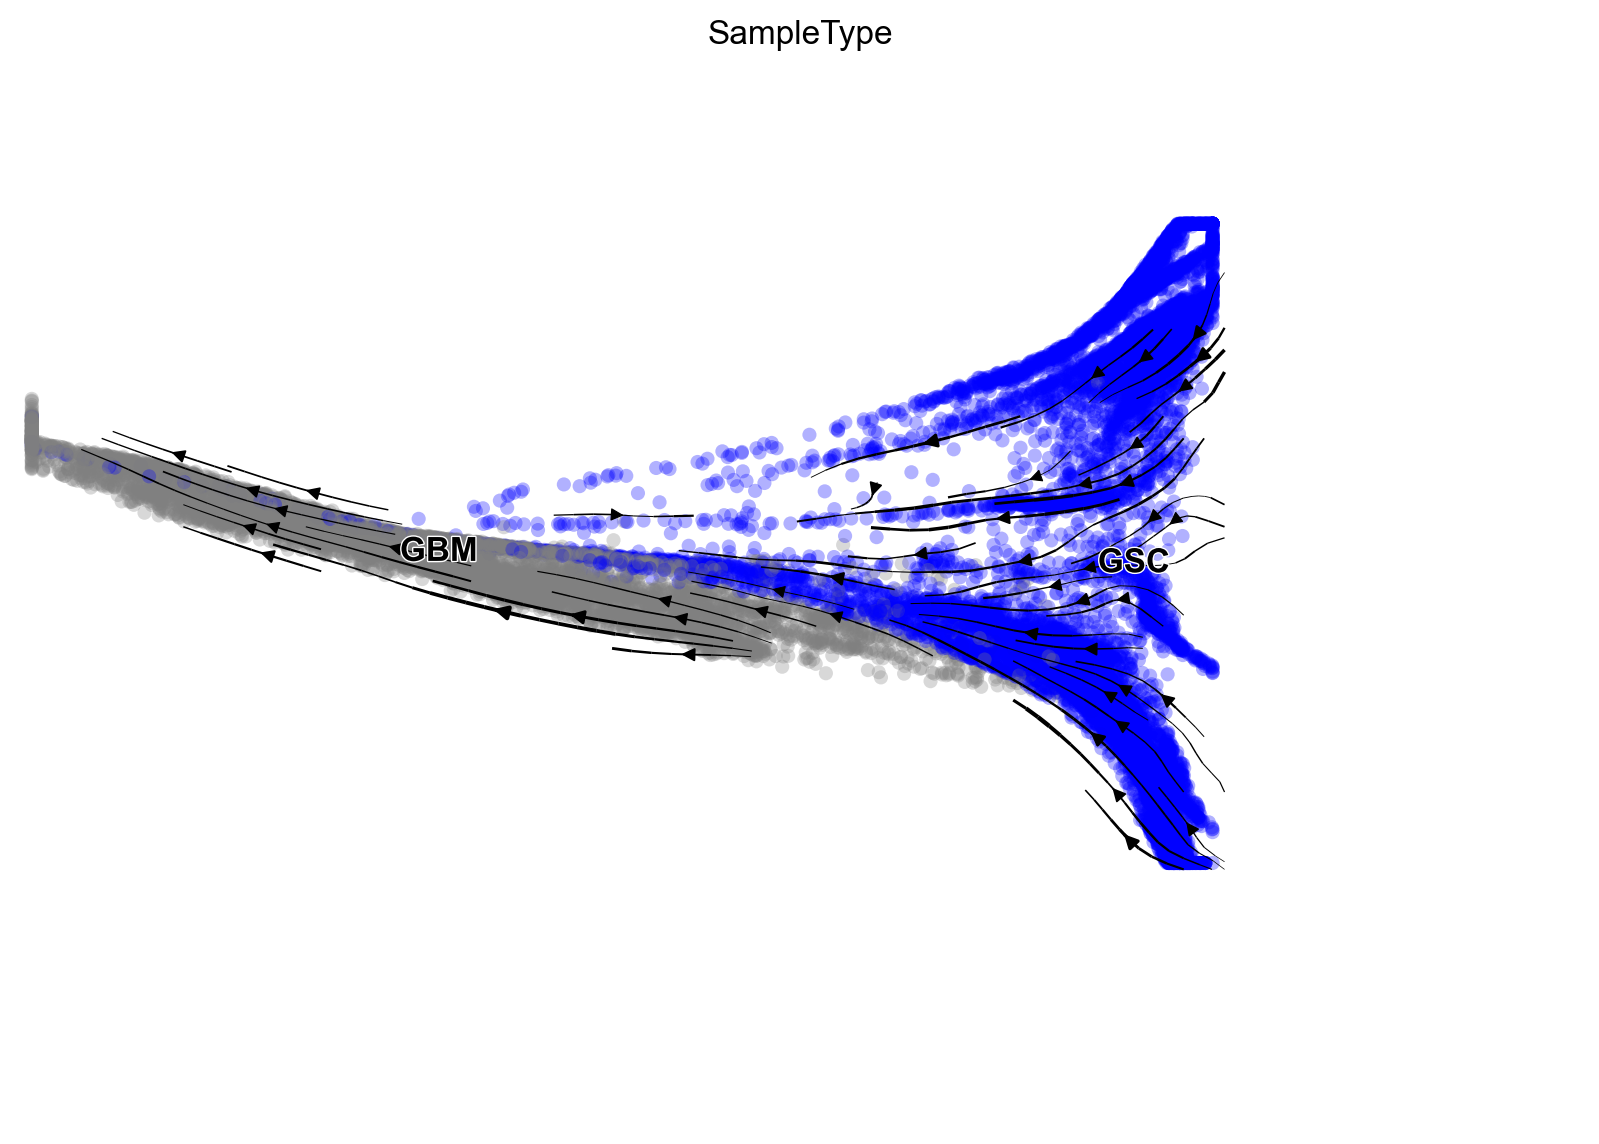

In [17]:
scv.pl.velocity_embedding_stream(adata, basis = 'dm', color = 'SampleType', palette = ['grey', 'blue'] , figsize = (10, 7))

In [18]:
adata.layers

Layers with keys: matrix, spliced, unspliced, Ms, Mu, velocity, variance_velocity

In [19]:
velocity_mat = adata.layers['velocity']

In [20]:
velocity_mat

array([[-0.00138043, -0.00468256,  0.12545078, ...,  0.11595423,
         0.0842751 , -0.00112441],
       [ 0.        , -0.00776507,  0.04013406, ...,  0.08195717,
         0.19718908, -0.00178055],
       [ 0.03439434, -0.00414836,  0.17184584, ...,  0.06202995,
         0.15980192, -0.0010606 ],
       ...,
       [ 0.01358778, -0.00420595, -0.00156539, ..., -0.0097444 ,
         0.0634874 , -0.00069014],
       [ 0.01168032, -0.00312742,  0.01740944, ...,  0.01625201,
         0.05855521,  0.01733284],
       [ 0.0220174 , -0.00101723,  0.05739837, ...,  0.08187294,
         0.02729998, -0.00057764]], dtype=float32)

In [21]:
velocity_mat.shape

(20343, 2000)

In [22]:
meta_data = adata.obs.loc[:, ('unique_id', 'SampleType', 'DM1', 'DM2')]

In [23]:
meta_data['unique_id']

G885_L_AACTTTCGTTTACTCT        G885_L_AACTTTCGTTTACTCT
G885_L_ACTGAACTCACCTTAT        G885_L_ACTGAACTCACCTTAT
G885_L_AATCGGTTCGTTGACA        G885_L_AATCGGTTCGTTGACA
G885_L_AACGTTGAGTGCCATT        G885_L_AACGTTGAGTGCCATT
G885_L_AACCATGGTGGCTCCA        G885_L_AACCATGGTGGCTCCA
                                       ...            
G945-I_L_TTTACTGCAGTCACTA    G945-I_L_TTTACTGCAGTCACTA
G945-I_L_TTTCCTCTCGACAGCC    G945-I_L_TTTCCTCTCGACAGCC
G945-I_L_TTGCGTCAGGTTACCT    G945-I_L_TTGCGTCAGGTTACCT
G945-I_L_TTGTAGGGTTCATGGT    G945-I_L_TTGTAGGGTTCATGGT
G945-I_L_TTTCCTCTCACGAAGG    G945-I_L_TTTCCTCTCACGAAGG
Name: unique_id, Length: 20343, dtype: object

In [24]:
velocity_df = pd.DataFrame(velocity_mat)

In [25]:
velocity_df['unique_id'] = meta_data['unique_id'].to_numpy()

In [26]:
velocity_df['unique_id']

0          G885_L_AACTTTCGTTTACTCT
1          G885_L_ACTGAACTCACCTTAT
2          G885_L_AATCGGTTCGTTGACA
3          G885_L_AACGTTGAGTGCCATT
4          G885_L_AACCATGGTGGCTCCA
                   ...            
20338    G945-I_L_TTTACTGCAGTCACTA
20339    G945-I_L_TTTCCTCTCGACAGCC
20340    G945-I_L_TTGCGTCAGGTTACCT
20341    G945-I_L_TTGTAGGGTTCATGGT
20342    G945-I_L_TTTCCTCTCACGAAGG
Name: unique_id, Length: 20343, dtype: object

In [27]:
meta_data = pd.merge(meta_data, velocity_df, how = 'left', on = 'unique_id')

In [28]:
meta_data

,unique_id,SampleType,DM1,DM2,0,1,2,3,4,5,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,G885_L_AACTTTCGTTTACTCT,GSC,0.005583,-0.009948,-0.001380,-0.004683,0.125451,0.035835,0.000000,0.000000,...,-0.011626,0.000000,0.0,0.277207,0.000000,0.515017,0.158579,0.115954,0.084275,-0.001124
1,G885_L_ACTGAACTCACCTTAT,GSC,0.005605,-0.008902,0.000000,-0.007765,0.040134,0.042270,-0.000076,-0.000775,...,-0.009653,-0.000191,0.0,0.299132,0.000000,0.558910,0.045469,0.081957,0.197189,-0.001781
2,G885_L_AATCGGTTCGTTGACA,GSC,0.005502,-0.010031,0.034394,-0.004148,0.171846,0.065727,-0.000068,0.000000,...,-0.006428,0.000000,0.0,0.094836,0.000000,0.451460,0.012388,0.062030,0.159802,-0.001061
3,G885_L_AACGTTGAGTGCCATT,GSC,0.005525,-0.009179,0.000000,-0.003520,0.118404,0.091631,-0.000145,-0.000958,...,-0.007963,0.000000,0.0,0.234595,0.000000,0.876302,0.020872,0.099741,0.048371,-0.001527
4,G885_L_AACCATGGTGGCTCCA,GSC,0.005379,-0.010073,0.014068,-0.004506,0.101144,0.062977,-0.000008,0.000000,...,-0.009265,0.000000,0.0,0.168530,0.000000,0.433179,0.082974,0.040835,0.150300,-0.001087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,G945-I_L_TTTACTGCAGTCACTA,GSC,0.002689,0.007652,-0.003567,-0.001522,0.014339,0.000000,0.000000,0.000000,...,-0.005159,0.000000,0.0,0.000000,0.000000,0.266887,0.126410,0.150900,0.089303,-0.000668
20339,G945-I_L_TTTCCTCTCGACAGCC,GSC,0.003468,0.008510,0.029492,-0.003046,-0.000895,0.067683,0.000000,-0.000646,...,-0.008042,0.000000,0.0,0.000000,0.000000,0.092501,0.207415,0.142859,0.017391,-0.000661
20340,G945-I_L_TTGCGTCAGGTTACCT,GSC,0.004772,0.011014,0.013588,-0.004206,-0.001565,0.073708,0.000000,0.000000,...,-0.006375,-0.000257,0.0,0.000000,0.000000,0.029521,0.138680,-0.009744,0.063487,-0.000690
20341,G945-I_L_TTGTAGGGTTCATGGT,GSC,0.005187,0.012118,0.011680,-0.003127,0.017409,0.048516,0.000000,0.000000,...,-0.007096,-0.000151,0.0,0.000000,0.000000,0.034881,0.067926,0.016252,0.058555,0.017333


In [29]:
meta_data.to_excel(os.path.join(output_dir, 'velocity_vectors.xlsx'))